In [1]:
import keras 
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
#ok funciona bien
#funcion que hace reshape de las imagenes
#sin agregar el bias
def reshapeImages(x,y):
    im_shape = x.shape[1:]
    x = np.reshape(x,(x.shape[0],np.prod(im_shape)))
    return x,y

# ejercicio 3 practica 2

In [3]:
#definicion de constantes
n_clases = 10 #cantidad de clases
n_capa1 = 100 #cantidad de neuronas capa 1
n_capa2 = n_clases #cantidad de neuronas capa 2 (= cantidad de clases)
#importamos los datos de training y testing
(x_train,y_train),(x_test,y_test) = cifar10.load_data() 
#reshaping y flatten
x_train,y_train = reshapeImages(x_train,y_train)
x_test,y_test = reshapeImages(x_test,y_test)
yy_train = to_categorical(y_train)
yy_test = to_categorical(y_test)
#preprocesado de los datos
mean = np.mean(x_train,axis=0)
sigma = np.std(x_train,axis=0)
x_train = (x_train - mean)/sigma
x_test = (x_test - mean)/sigma
n_dim = x_train.shape[1] #dimension de entrada
epocas = 200 #cantidad de epocas

In [4]:
x = keras.layers.Input(shape=(n_dim,))
l1 = keras.layers.Dense(units=n_capa1, activation='sigmoid', use_bias=True, 
                           kernel_regularizer=keras.regularizers.l2(1e-5))(x)
l2 = keras.layers.Dense(units=n_capa2, activation='linear',use_bias=True,
                           kernel_regularizer=keras.regularizers.l2(1e-5))(l1)
model = keras.Model(inputs=x, outputs=l2)
optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(optimizer, loss=keras.losses.MSE, metrics=['acc'])
history = model.fit(x_train, yy_train, epochs=epocas, validation_data=(x_test, yy_test),batch_size=100, verbose=2)


Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 4s - loss: 0.1228 - acc: 0.1867 - val_loss: 0.1036 - val_acc: 0.2282
Epoch 2/200
 - 2s - loss: 0.1000 - acc: 0.2440 - val_loss: 0.0971 - val_acc: 0.2637
Epoch 3/200
 - 2s - loss: 0.0953 - acc: 0.2731 - val_loss: 0.0939 - val_acc: 0.2841
Epoch 4/200
 - 2s - loss: 0.0927 - acc: 0.2905 - val_loss: 0.0919 - val_acc: 0.3011
Epoch 5/200
 - 3s - loss: 0.0909 - acc: 0.3043 - val_loss: 0.0905 - val_acc: 0.3130
Epoch 6/200
 - 2s - loss: 0.0896 - acc: 0.3165 - val_loss: 0.0894 - val_acc: 0.3214
Epoch 7/200
 - 3s - loss: 0.0885 - acc: 0.3256 - val_loss: 0.0886 - val_acc: 0.3273
Epoch 8/200
 - 2s - loss: 0.0876 - acc: 0.3356 - val_loss: 0.0879 - val_acc: 0.3332
Epoch 9/200
 - 2s - loss: 0.0869 - acc: 0.3443 - val_loss: 0.0873 - val_acc: 0.3388
Epoch 10/200
 - 2s - loss: 0.0863 - acc: 0.3498 - val_loss: 0.0868 - val_acc: 0.3459
Epoch 11/200
 - 3s - loss: 0.0858 - acc: 0.3564 - val_loss: 0.0863 - val_acc: 0.3506
Epoch 12/200
 - 2s - los

Epoch 97/200
 - 2s - loss: 0.0759 - acc: 0.4729 - val_loss: 0.0792 - val_acc: 0.4224
Epoch 98/200
 - 2s - loss: 0.0759 - acc: 0.4747 - val_loss: 0.0791 - val_acc: 0.4238
Epoch 99/200
 - 3s - loss: 0.0759 - acc: 0.4743 - val_loss: 0.0791 - val_acc: 0.4253
Epoch 100/200
 - 3s - loss: 0.0758 - acc: 0.4750 - val_loss: 0.0791 - val_acc: 0.4248
Epoch 101/200
 - 3s - loss: 0.0758 - acc: 0.4755 - val_loss: 0.0791 - val_acc: 0.4262
Epoch 102/200
 - 3s - loss: 0.0758 - acc: 0.4758 - val_loss: 0.0790 - val_acc: 0.4251
Epoch 103/200
 - 3s - loss: 0.0757 - acc: 0.4764 - val_loss: 0.0790 - val_acc: 0.4260
Epoch 104/200
 - 3s - loss: 0.0757 - acc: 0.4767 - val_loss: 0.0790 - val_acc: 0.4279
Epoch 105/200
 - 3s - loss: 0.0756 - acc: 0.4776 - val_loss: 0.0789 - val_acc: 0.4249
Epoch 106/200
 - 3s - loss: 0.0756 - acc: 0.4773 - val_loss: 0.0789 - val_acc: 0.4271
Epoch 107/200
 - 3s - loss: 0.0756 - acc: 0.4787 - val_loss: 0.0789 - val_acc: 0.4263
Epoch 108/200
 - 2s - loss: 0.0755 - acc: 0.4795 - val_lo

Epoch 193/200
 - 3s - loss: 0.0730 - acc: 0.5076 - val_loss: 0.0776 - val_acc: 0.4389
Epoch 194/200
 - 3s - loss: 0.0730 - acc: 0.5080 - val_loss: 0.0776 - val_acc: 0.4415
Epoch 195/200
 - 3s - loss: 0.0729 - acc: 0.5078 - val_loss: 0.0776 - val_acc: 0.4399
Epoch 196/200
 - 3s - loss: 0.0729 - acc: 0.5083 - val_loss: 0.0776 - val_acc: 0.4425
Epoch 197/200
 - 3s - loss: 0.0729 - acc: 0.5081 - val_loss: 0.0776 - val_acc: 0.4410
Epoch 198/200
 - 3s - loss: 0.0729 - acc: 0.5090 - val_loss: 0.0776 - val_acc: 0.4399
Epoch 199/200
 - 3s - loss: 0.0728 - acc: 0.5089 - val_loss: 0.0776 - val_acc: 0.4411
Epoch 200/200
 - 3s - loss: 0.0728 - acc: 0.5096 - val_loss: 0.0775 - val_acc: 0.4408


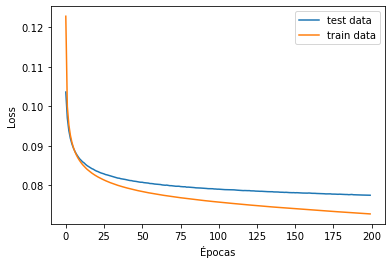

In [5]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej2_1_loss.pdf')

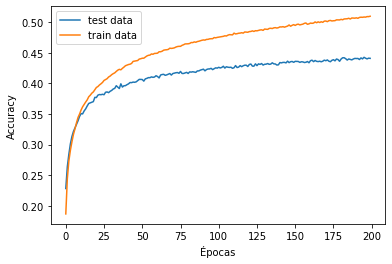

In [6]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.savefig('ej2_1_acc.pdf')

# ejercicio 4 practica 2

In [5]:
x = keras.layers.Input(shape=(n_dim,))
l1 = keras.layers.Dense(units=n_capa1, activation='sigmoid', use_bias=True, 
                           kernel_regularizer=keras.regularizers.l2(1e-5))(x)
l2 = keras.layers.Dense(units=n_capa2, activation='linear',use_bias=True,
                           kernel_regularizer=keras.regularizers.l2(1e-5))(l1)
model = keras.Model(inputs=x, outputs=l2)
optimizer = keras.optimizers.SGD(learning_rate=5e-3)
model.compile(optimizer, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['acc'])
history = model.fit(x_train, yy_train, epochs=epocas, validation_data=(x_test, yy_test),batch_size=100, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
 - 6s - loss: 2.0466 - acc: 0.2732 - val_loss: 1.9167 - val_acc: 0.3361
Epoch 2/200
 - 4s - loss: 1.8750 - acc: 0.3514 - val_loss: 1.8480 - val_acc: 0.3608
Epoch 3/200
 - 4s - loss: 1.8226 - acc: 0.3715 - val_loss: 1.8105 - val_acc: 0.3747
Epoch 4/200
 - 4s - loss: 1.7908 - acc: 0.3834 - val_loss: 1.7861 - val_acc: 0.3830
Epoch 5/200
 - 4s - loss: 1.7683 - acc: 0.3913 - val_loss: 1.7678 - val_acc: 0.3907
Epoch 6/200
 - 4s - loss: 1.7507 - acc: 0.3971 - val_loss: 1.7536 - val_acc: 0.3938
Epoch 7/200
 - 4s - loss: 1.7363 - acc: 0.4027 - val_loss: 1.7407 - val_acc: 0.3980
Epoch 8/200
 - 4s - loss: 1.7239 - acc: 0.4072 - val_loss: 1.7310 - val_acc: 0.4037
Epoch 9/200
 - 4s - loss: 1.7132 - acc: 0.4100 - val_loss: 1.7224 - val_acc: 0.4052
Epoch 10/200
 - 4s - loss: 1.7036 - acc: 0.4144 - val_loss: 1.7148 - val_acc: 0.4102
Epoch 11/200
 - 4s - loss: 1.6950 - acc: 0.4178 - val_loss: 1.7070 - val_acc: 0.4112
Epoch 12/200
 - 4s - los

Epoch 97/200
 - 3s - loss: 1.4132 - acc: 0.5275 - val_loss: 1.5600 - val_acc: 0.4672
Epoch 98/200
 - 3s - loss: 1.4110 - acc: 0.5278 - val_loss: 1.5589 - val_acc: 0.4684
Epoch 99/200
 - 3s - loss: 1.4089 - acc: 0.5288 - val_loss: 1.5577 - val_acc: 0.4686
Epoch 100/200
 - 3s - loss: 1.4066 - acc: 0.5307 - val_loss: 1.5586 - val_acc: 0.4690
Epoch 101/200
 - 3s - loss: 1.4043 - acc: 0.5315 - val_loss: 1.5571 - val_acc: 0.4682
Epoch 102/200
 - 3s - loss: 1.4020 - acc: 0.5314 - val_loss: 1.5572 - val_acc: 0.4664
Epoch 103/200
 - 3s - loss: 1.3998 - acc: 0.5324 - val_loss: 1.5562 - val_acc: 0.4714
Epoch 104/200
 - 3s - loss: 1.3975 - acc: 0.5334 - val_loss: 1.5554 - val_acc: 0.4692
Epoch 105/200
 - 3s - loss: 1.3952 - acc: 0.5343 - val_loss: 1.5550 - val_acc: 0.4702
Epoch 106/200
 - 3s - loss: 1.3931 - acc: 0.5351 - val_loss: 1.5553 - val_acc: 0.4689
Epoch 107/200
 - 3s - loss: 1.3908 - acc: 0.5355 - val_loss: 1.5533 - val_acc: 0.4687
Epoch 108/200
 - 3s - loss: 1.3886 - acc: 0.5369 - val_lo

Epoch 193/200
 - 3s - loss: 1.2174 - acc: 0.6008 - val_loss: 1.5420 - val_acc: 0.4780
Epoch 194/200
 - 3s - loss: 1.2155 - acc: 0.6021 - val_loss: 1.5420 - val_acc: 0.4764
Epoch 195/200
 - 3s - loss: 1.2136 - acc: 0.6026 - val_loss: 1.5408 - val_acc: 0.4783
Epoch 196/200
 - 3s - loss: 1.2115 - acc: 0.6038 - val_loss: 1.5423 - val_acc: 0.4784
Epoch 197/200
 - 3s - loss: 1.2098 - acc: 0.6032 - val_loss: 1.5442 - val_acc: 0.4769
Epoch 198/200
 - 3s - loss: 1.2082 - acc: 0.6042 - val_loss: 1.5432 - val_acc: 0.4760
Epoch 199/200
 - 3s - loss: 1.2061 - acc: 0.6049 - val_loss: 1.5423 - val_acc: 0.4798
Epoch 200/200
 - 3s - loss: 1.2044 - acc: 0.6054 - val_loss: 1.5439 - val_acc: 0.4777


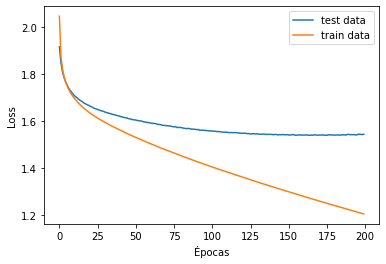

In [8]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej2_2_loss.pdf')

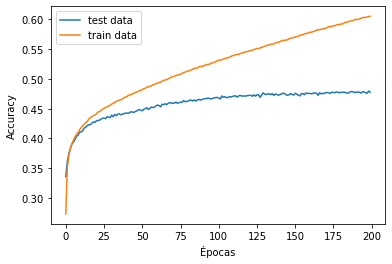

In [9]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.savefig('ej2_2_acc.pdf')

# ejercicio 6 practica 2 - situacion 1

In [60]:
def my_acc(y_true, y_pred):
    acc = tf.reduce_mean(tf.cast(tf.less_equal(tf.abs(y_true-y_pred),0.1), tf.float32))
    return acc

x_data = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
y_data = np.array([[1],[-1],[-1],[1]])
x = keras.layers.Input(shape=(2,))
l1 = keras.layers.Dense(units=2, activation='tanh', use_bias=True,
kernel_regularizer= keras.regularizers.l2(1e-3))(x)
l2 = keras.layers.Dense(units=1, activation='tanh', use_bias=True)(l1)
model = keras.Model(inputs=x, outputs=l2)
optimizer = keras.optimizers.SGD(learning_rate=0.5)
model.compile(optimizer, loss=keras.losses.MSE, metrics=[my_acc, 'acc', 'mse'])
history = model.fit(x_data, y_data, epochs=100,batch_size=4, verbose=2)

Epoch 1/100
 - 0s - loss: 1.2722 - my_acc: 0.0000e+00 - acc: 0.2500 - mse: 1.2685
Epoch 2/100
 - 0s - loss: 0.7611 - my_acc: 0.0000e+00 - acc: 0.0000e+00 - mse: 0.7575
Epoch 3/100
 - 0s - loss: 0.5449 - my_acc: 0.0000e+00 - acc: 0.5000 - mse: 0.5413
Epoch 4/100
 - 0s - loss: 0.3215 - my_acc: 0.0000e+00 - acc: 0.0000e+00 - mse: 0.3174
Epoch 5/100
 - 0s - loss: 0.2304 - my_acc: 0.0000e+00 - acc: 0.5000 - mse: 0.2262
Epoch 6/100
 - 0s - loss: 0.1613 - my_acc: 0.0000e+00 - acc: 1.0000 - mse: 0.1568
Epoch 7/100
 - 0s - loss: 0.1304 - my_acc: 0.0000e+00 - acc: 1.0000 - mse: 0.1258
Epoch 8/100
 - 0s - loss: 0.1101 - my_acc: 0.0000e+00 - acc: 1.0000 - mse: 0.1052
Epoch 9/100
 - 0s - loss: 0.0951 - my_acc: 0.0000e+00 - acc: 1.0000 - mse: 0.0901
Epoch 10/100
 - 0s - loss: 0.0837 - my_acc: 0.0000e+00 - acc: 1.0000 - mse: 0.0786
Epoch 11/100
 - 0s - loss: 0.0747 - my_acc: 0.0000e+00 - acc: 1.0000 - mse: 0.0695
Epoch 12/100
 - 0s - loss: 0.0674 - my_acc: 0.0000e+00 - acc: 1.0000 - mse: 0.0621
Epoch

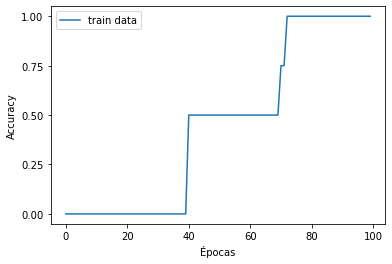

In [61]:
plt.plot(history.history['my_acc'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1.25, step=0.25))
plt.savefig('ej2_3_acc.pdf')

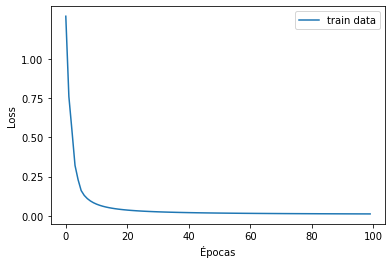

In [62]:
plt.plot(history.history['loss'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.yticks(np.arange(0, 1.25, step=0.25))
plt.savefig('ej2_3_loss.pdf')

# ejercicio 6 practica 2 - situacion 2

In [57]:
x_data = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
y_data = np.array([[1],[-1],[-1],[1]])
x = keras.layers.Input(shape=(2,))
l1 = keras.layers.Dense(units=2, activation='tanh', use_bias=True,
kernel_regularizer= keras.regularizers.l2(1e-3))(x)
l2 = keras.layers.Concatenate()([x,l1])
l3 = keras.layers.Dense(units=1, activation='tanh', use_bias=True)(l2)
model = keras.Model(inputs=x, outputs=l3)
optimizer = keras.optimizers.SGD(learning_rate=0.5)
model.compile(optimizer, loss=keras.losses.MSE, metrics=[my_acc, 'acc', 'mse'])
history = model.fit(x_data, y_data, epochs=100,batch_size=4, verbose=2)

Epoch 1/100
 - 0s - loss: 1.2871 - my_acc: 0.0000e+00 - acc: 0.2500 - mse: 1.2852
Epoch 2/100
 - 0s - loss: 1.0845 - my_acc: 0.0000e+00 - acc: 0.2500 - mse: 1.0826
Epoch 3/100
 - 0s - loss: 1.0050 - my_acc: 0.0000e+00 - acc: 0.0000e+00 - mse: 1.0030
Epoch 4/100
 - 0s - loss: 0.9143 - my_acc: 0.0000e+00 - acc: 0.2500 - mse: 0.9123
Epoch 5/100
 - 0s - loss: 0.8268 - my_acc: 0.0000e+00 - acc: 0.0000e+00 - mse: 0.8246
Epoch 6/100
 - 0s - loss: 0.7775 - my_acc: 0.0000e+00 - acc: 0.2500 - mse: 0.7752
Epoch 7/100
 - 0s - loss: 0.7340 - my_acc: 0.0000e+00 - acc: 0.5000 - mse: 0.7314
Epoch 8/100
 - 0s - loss: 0.6995 - my_acc: 0.0000e+00 - acc: 0.2500 - mse: 0.6968
Epoch 9/100
 - 0s - loss: 0.6549 - my_acc: 0.0000e+00 - acc: 0.5000 - mse: 0.6518
Epoch 10/100
 - 0s - loss: 0.5029 - my_acc: 0.0000e+00 - acc: 0.5000 - mse: 0.4997
Epoch 11/100
 - 0s - loss: 0.4691 - my_acc: 0.0000e+00 - acc: 0.5000 - mse: 0.4655
Epoch 12/100
 - 0s - loss: 0.3382 - my_acc: 0.0000e+00 - acc: 0.5000 - mse: 0.3344
Epoch

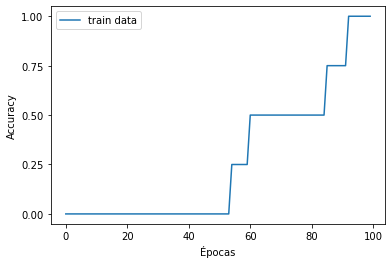

In [58]:
plt.plot(history.history['my_acc'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1.25, step=0.25))
plt.savefig('ej2_4_acc.pdf')

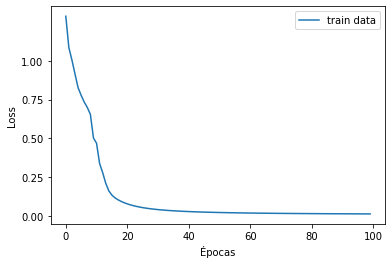

In [59]:
plt.plot(history.history['loss'],label='train data')
plt.legend()
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.yticks(np.arange(0, 1.25, step=0.25))
plt.savefig('ej2_4_loss.pdf')

In [5]:
l1 = [1,2,3]
l2 = [2,0,500]
l = max(max(l1,l2))
print(l)

500
